In [1]:
import numpy as np
X = 2 * np.random.rand(100,1)
y  = 4+3*X + np.random.randn(100,1)

In [7]:
X_b = np.c_[np.ones((100,1)),X]
# theta = (XtX)sup(-1)Xty (t = transpose)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [8]:
theta_best

array([[4.07482669],
       [2.8305569 ]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07482669],
       [9.7359405 ]])

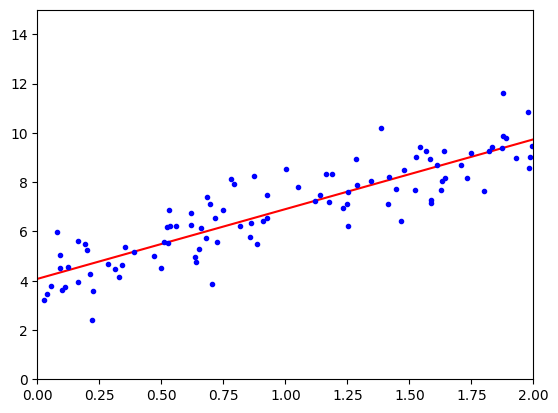

In [10]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.07482669]), array([[2.8305569]]))

In [12]:
lin_reg.predict(X_new)

array([[4.07482669],
       [9.7359405 ]])

In [13]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond = 1e-6)

In [15]:
theta_best_svd# theta = Xsup(+)y Xsup(+) is the pseudoinverse of x

array([[4.07482669],
       [2.8305569 ]])

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.07482669],
       [2.8305569 ]])

In [17]:
eta = 0.1
n_iterations = 1000
m=100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [18]:
theta

array([[4.07482669],
       [2.8305569 ]])

In [19]:
n_epochs = 50
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [20]:
theta

array([[4.11256744],
       [2.88878238]])

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.11109109]), array([2.89962134]))